In [1]:
# Fontes:
# https://www.gov.br/agricultura/pt-br/assuntos/camaras-setoriais-tematicas/documentos/camaras-setoriais/animais-e-estimacao/2019/27a-ro/inteligencia-de-mercado-convertido.pdf
# https://www.gov.br/agricultura/pt-br/assuntos/camaras-setoriais-tematicas/documentos/camaras-setoriais/animais-e-estimacao/cs-animais-de-estimacao-anos-anteriores
# https://labnoticias.jor.br/2024/01/26/30-milhoes-de-animais-estao-nas-ruas-segundo-dados-da-organizacao-mundial-da-saude-oms/
# https://noticias.unb.br/artigos-main/6573-abandono-de-animais-e-crime
# https://developers.google.com/maps/documentation/places/web-service/overview?hl=pt-br#places-api-new
# https://cidades.ibge.gov.br/
# ChatGpto1
# ChatGpt4o

### Ideias

1. Fazer uma pesquisa aproximada de quantidade de animais de rua em minas ( ver lugar)</br>
https://www.gov.br/agricultura/pt-br/assuntos/camaras-setoriais-tematicas/documentos/camaras-setoriais/animais-e-estimacao/2019/27a-ro/inteligencia-de-mercado-convertido.pdf</br>
https://www.gov.br/agricultura/pt-br/assuntos/camaras-setoriais-tematicas/documentos/camaras-setoriais/animais-e-estimacao/cs-animais-de-estimacao-anos-anteriores</br>
https://labnoticias.jor.br/2024/01/26/30-milhoes-de-animais-estao-nas-ruas-segundo-dados-da-organizacao-mundial-da-saude-oms/</br>
https://noticias.unb.br/artigos-main/6573-abandono-de-animais-e-crime).

2. Fazer uma pesquisa da populacao da cidade escolhida (IBGE)</br>
https://cidades.ibge.gov.br/
3. Fazer uma pesquisa,(sera que existe?) de estabelcimentos. Caso nao existe colocar heuristico. Rodar uma macro no maps?</br>
https://developers.google.com/maps/documentation/places/web-service/overview?hl=pt-br#places-api-new

4. Fazer uma esclada em busca de padroes (10-100-1000)

--------------------------------------------------------------------------
4. Entedimento das metricas em busca de descobrir conhecimento em uma rede


--------------------------------------------------------------------------
1. Proximos passos</br>
Plotar a rede sobre o mapa (dados geograficos)

In [2]:
!pip install unidecode
!pip install Faker
!pip install folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.2 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

import sqlite3
import os
import random
from datetime import datetime, timedelta
from faker import Faker
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import folium
import requests
import time
from timeit import default_timer as timer
from datetime import timedelta
import matplotlib.patches as mpatches

Mounted at /content/drive


In [4]:
import platform
import psutil

def my_setup():
    print("=== Informações do Sistema ===")
    print(f"Sistema: {platform.system()}")
    print(f"Nome do Nodo: {platform.node()}")
    print(f"Plataforma: {platform.platform()}")
    print(f"Versão: {platform.version()}")
    print(f"Arquitetura: {platform.architecture()[0]}")
    print(f"Processador: {platform.processor()}")

    print("\n=== Informações da CPU ===")
    print(f"Cores Físicos: {psutil.cpu_count(logical=False)}")
    print(f"Cores Lógicos: {psutil.cpu_count(logical=True)}")
    print(f"Frequência Máxima: {psutil.cpu_freq().max} MHz")
    print(f"Frequência Atual: {psutil.cpu_freq().current} MHz")
    print(f"Uso de CPU por Núcleo: {psutil.cpu_percent(interval=1, percpu=True)}")

    print("\n=== Informações da Memória ===")
    mem = psutil.virtual_memory()
    print(f"Memória Total: {mem.total / (1024 ** 3):.2f} GB")
    print(f"Memória Disponível: {mem.available / (1024 ** 3):.2f} GB")
    print(f"Uso de Memória: {mem.percent}%")

    print("\n=== Informações do Disco ===")
    disk = psutil.disk_usage('/')
    print(f"Tamanho Total do Disco: {disk.total / (1024 ** 3):.2f} GB")
    print(f"Espaço Usado: {disk.used / (1024 ** 3):.2f} GB")
    print(f"Espaço Livre: {disk.free / (1024 ** 3):.2f} GB")
    print(f"Porcentagem de Uso do Disco: {disk.percent}%")

    print("\n=== Informações da GPU ===")
    gpu_info = !nvidia-smi --query-gpu=name,memory.total,memory.used,memory.free --format=csv,noheader
    if gpu_info:
        print("\n".join(gpu_info))
    else:
        print("Nenhuma GPU NVIDIA detectada.")

# Fonte: Chatgpt

my_setup()

=== Informações do Sistema ===
Sistema: Linux
Nome do Nodo: 50fc1a9f6acd
Plataforma: Linux-6.1.85+-x86_64-with-glibc2.35
Versão: #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
Arquitetura: 64bit
Processador: x86_64

=== Informações da CPU ===
Cores Físicos: 1
Cores Lógicos: 2
Frequência Máxima: 0.0 MHz
Frequência Atual: 2199.998 MHz
Uso de CPU por Núcleo: [99.0, 99.0]

=== Informações da Memória ===
Memória Total: 12.67 GB
Memória Disponível: 11.02 GB
Uso de Memória: 13.1%

=== Informações do Disco ===
Tamanho Total do Disco: 225.83 GB
Espaço Usado: 32.65 GB
Espaço Livre: 193.16 GB
Porcentagem de Uso do Disco: 14.5%

=== Informações da GPU ===
/bin/bash: line 1: nvidia-smi: command not found


In [5]:
nome_municipio= 'São José dos Campos'
uf = 'SP'

url = f'https://servicodados.ibge.gov.br/api/v1/localidades/estados/{uf}/municipios'

response = requests.get(url)

if response.status_code == 200:
    municipios = response.json()
    municipio_encontrado = None
    for municipio in municipios:
        if municipio['nome'].lower() == nome_municipio.lower():
            municipio_encontrado = municipio
            response = requests.get(f"https://servicodados.ibge.gov.br/api/v1/pesquisas/indicadores/96385%7C29171%7C96386/resultados/{ municipio_encontrado['id']}")
            if response.status_code == 200:
              dados_ibge = response.json()
              populacao_censo_2022 = int(float(dados_ibge[0]['res'][0]['res']['2022'].replace(',', '.')))
              populacao_projetada_2024 = int(float(dados_ibge[1]['res'][0]['res']['2024'].replace(',', '.')))
              densidade_demografica_2022 = int(float(dados_ibge[2]['res'][0]['res']['2022'].replace(',', '.')))
            break
    else:
        print("Município não encontrado no estado especificado.")
else:
    print(f"Erro na requisição: {response.status_code}")

print('populacao_censo_2022',populacao_censo_2022)
print('populacao_projetada_2024',populacao_projetada_2024)
print('densidade_demografica_2022',densidade_demografica_2022)

populacao_censo_2022 697054
populacao_projetada_2024 724756
densidade_demografica_2022 634


In [6]:
url = "https://maps.googleapis.com/maps/api/geocode/json"
params = {
    "address": f"{nome_municipio}, {uf}",
    "key": 'API_KEY'
}
response = requests.get(url, params=params)
dados = response.json()
if "results" in dados and len(dados["results"]) > 0:
    resultado = dados["results"][0]
    coordenadas_centro = resultado["geometry"]["location"]
    bounding_box = resultado["geometry"].get("bounds", resultado["geometry"]["viewport"])

In [7]:
url = 'https://places.googleapis.com/v1/places:searchText'

headers = {
    'Content-Type': 'application/json',
    'X-Goog-Api-Key': 'API_KEY',
    'X-Goog-FieldMask': 'places.displayName,places.formattedAddress,places.priceLevel,places.types,nextPageToken'
}

def processar_locais(lugares, bounding_box):
    locais = []
    for lugar in lugares:
        nome = lugar.get('displayName', {}).get('text', 'Nome não disponível')
        endereco = lugar.get('formattedAddress', 'Endereço não disponível')
        tipo_estabelecimento = lugar.get('types', [])

        # Geocoding para coordenadas
        response_geocode = requests.get(
            'https://maps.googleapis.com/maps/api/geocode/json',
            params={'address': endereco, 'key': 'API_KEY'}
        )
        if response_geocode.status_code == 200:
            resultado_geocode = response_geocode.json()
            if resultado_geocode.get('status') == 'OK':
                coordenadas = resultado_geocode['results'][0]['geometry']['location']
                latitude = coordenadas['lat']
                longitude = coordenadas['lng']
                if (bounding_box['southwest']['lat'] <= latitude <= bounding_box['northeast']['lat'] and
                        bounding_box['southwest']['lng'] <= longitude <= bounding_box['northeast']['lng']):
                    locais.append({
                        "nome": nome,
                        "endereco": endereco,
                        "tipo_estabelecimento": ', '.join(tipo_estabelecimento),
                        "latitude": latitude,
                        "longitude": longitude
                    })
                else:
                    print(f"Coordenadas fora da bounding box: {nome} ({latitude}, {longitude})")
            else:
                print(f"Não foi possível obter as coordenadas para {endereco}: {resultado_geocode.get('status')}")
        else:
            print(f"Erro na requisição para Geocoding API: {response_geocode.status_code}")
    return locais

data = {
    "textQuery": f"petshops,clinicas veterinárias, ongs de animais em {nome_municipio}-{uf}",
    "pageSize": 20
}

response = requests.post(url, headers=headers, json=data)

if response.status_code == 200:
    resultado = response.json()
    locais = processar_locais(resultado.get('places', []), bounding_box=bounding_box)

    next_page_token = resultado.get('nextPageToken')

    while next_page_token:
        time.sleep(2)
        next_response = requests.post(
            url,
            headers=headers,
            json={"textQuery": data['textQuery'], "pageSize": data['pageSize'], "pageToken": next_page_token}
        )

        if next_response.status_code == 200:
            next_resultado = next_response.json()
            locais.extend(processar_locais(next_resultado.get('places', []), bounding_box=bounding_box))
            next_page_token = next_resultado.get('nextPageToken')
        else:
            print(f"Erro ao buscar próxima página: {next_response.status_code}")
            print(next_response.json())
            break

    print("Locais processados:", locais)
else:
    print(f"Erro na requisição inicial: {response.status_code}")
    print(response.json())


Coordenadas fora da bounding box: Associação Melhores Amigos dos Animais (-23.1011367, -45.703926)
Locais processados: [{'nome': 'Hospital Veterinário Carinho de Bicho - Unidade Adhemar de Barros', 'endereco': 'Av. Dr. Ademar de Barros, 1000 - Jardim Sao Dimas, São José dos Campos - SP, 12245-011, Brazil', 'tipo_estabelecimento': 'veterinary_care, point_of_interest, establishment', 'latitude': -23.2008553, 'longitude': -45.8927735}, {'nome': 'Hospital Veterinário Carinho de Bicho - Unidade Parque Industrial', 'endereco': 'Av. Paraíso, 90 - Parque Industrial, São José dos Campos - SP, 12235-460, Brazil', 'tipo_estabelecimento': 'veterinary_care, health, point_of_interest, establishment', 'latitude': -23.2369783, 'longitude': -45.902942}, {'nome': 'Veterinary Clinic Soft Affection - Unit Vila Ema', 'endereco': 'R. Me. Paula de São José, 171 - Vila Ema, São José dos Campos - SP, 12243-010, Brazil', 'tipo_estabelecimento': 'veterinary_care, health, point_of_interest, establishment', 'latit

In [8]:
centro = {
    'lat': (bounding_box['northeast']['lat'] + bounding_box['southwest']['lat']) / 2,
    'lng': (bounding_box['northeast']['lng'] + bounding_box['southwest']['lng']) / 2
}

mapa = folium.Map(
    location=[centro['lat'], centro['lng']],
)

folium.Rectangle(
    bounds=[
        [bounding_box['southwest']['lat'], bounding_box['southwest']['lng']],  # Sudoeste
        [bounding_box['northeast']['lat'], bounding_box['northeast']['lng']]   # Nordeste
    ],
    color='blue',
    fill=True,
    fill_opacity=0.2,
    tooltip="Limites da cidade"
).add_to(mapa)

mapa




In [9]:
dfestabelecimentos = pd.DataFrame(locais)

In [10]:
dfestabelecimentos

nome  \
0   Hospital Veterinário Carinho de Bicho - Unidad...   
1   Hospital Veterinário Carinho de Bicho - Unidad...   
2    Veterinary Clinic Soft Affection - Unit Vila Ema   
3   Maple Vet 24 horas - Clínica Veterinária Popul...   
4               Veterinary Clinic Space Dogs and Cats   
5                        Clínica Veterinária Petzfera   
6             Hospital Veterinário Pigovet - 24 horas   
7               Popular Pet - Clínica Veterinária 24h   
8                      Hospital Veterinário ProntoDog   
9            ProntoVet 24 Horas - Clínica Veterinária   
10                         Veterinary clinic Hungaria   
11                                    Mi & Au Petcare   
12                          Déborah Hope Pet Proteção   
13              Hospital Veterinário Bicho Brasil 24h   
14                                              Puppy   
15                                  Clínica Bontratto   
16  Clínica Veterinária & Petshop Apaixonados Por ...   
17  VetVilla Popular - Clínica Veterinária Popular...   
18  Clínica Veterinária - Grupo Estimacão - Unidad...   
19  ZOO ANIMAL ESPECIALIZADA EM EXÓTICOS ,SILVESTR...   
20  SOS Veterinária - Clínica e Cirurgia de Cães e...   
21  Clínica Veterinária & Petshop Apaixonados Por ...   
22               Veterinária e Pet Shop São Francisco   
23          Pets Consultório Veterinário e Banho Tosa   
24        Bicho Bonito Clínica Veterinária e Pet Shop   
25                                   Mercadão Pet SJC   
26                       ProPatas Clínica Veterinária   
27                                      Natural Patas   
28        Bicho Amigo Clinica Veterinária e Pets Shop   
29        Arte e Manha Pet Shop & Clínica Veterinária   
30          Clínica Veterinária Pelo & Zelo Unidade 1   
31                                    Bosque Dos Pets   
32                        DocPets Clínica Veterinária   
33          Cão Carinho Clínica Veterinária e Petshop   
34                  Popular Pet e Clinica 24h - Putim   
35                      SUPER PET CLÍNICA VETERINÁRIA   
36                            Pet Company Veterinária   
37              Clinica Veterinária Bosque dos Bichos   
38      DrPet Clínica Veterinária São José Dos Campos   
39                                      Pegada Animal   
40                      Garden City Veterinary Clinic   
41               PoupaVet Clínica Veterinária 24horas   
42  RIP Pet Crematório de Animais São José dos Campos   
43                                          Peti Gatô   
44             The Cat Shop - Especialista em Felinos   
45                                            Polipet   
46       Paiol Centro Veterinário São José dos Campos   
47                                          Amigo pet   
48                             Popular Pet - Urbanova   
49  Vetbio - Veterinary Clinic of Wild and Exotic ...   
50                Toca dos Bichos Clínica Veterinária   
51                     Eh Pet Pet Creche & Hospedagem   
52                                         Templo Zoo   
53  PET SHOP PARQUE DOS PETS SJC - Banho e tosa - ...   
54                 Colher de Patas - Natural Pet Food   
55                    Clínica Veterinária ANIMAL VALE   
56  Netcão Petshop | 27 anos apaixonados por pet, ...   
57  Instituto Ecológico e de Proteção aos Animais ...   
58                                             RG Pet   

                                             endereco  \
0   Av. Dr. Ademar de Barros, 1000 - Jardim Sao Di...   
1   Av. Paraíso, 90 - Parque Industrial, São José ...   
2   R. Me. Paula de São José, 171 - Vila Ema, São ...   
3   R. Siqueira Campos, 314 - Centro, São José dos...   
4   Av. Cidade Jardim, 361 - Jardim Satélite, São ...   
5   R. Siqueira Campos, 483 - Centro, São José dos...   
6   Av. Paulo Becker, 123 - Vila Adyana, São José ...   
7   R. Máximo Brogliato, 450 - Loja 12 - Urbanova,...   
8   R. Paraibuna, 140 - Jardim Sao Dimas, São José...   
9   Av. Pres. Tancredo Neves, 4270 - Parque Novo H...   
1

In [11]:
# extrair as interaçoes para algo mais complexo.
fake = Faker('pt_BR')

db_path = '/content/drive/MyDrive/database_1_0_0.db'
TIPO_ANIMAIS = ['cachorro', 'gato'] # ok. O estudo justifica
TIPO_INTERACOES = ['apadrinhamento', 'doação', 'abrigo temporário', 'resgate']


In [12]:
try:
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()
except Exception as e:
    print(f'Erro ao conectar: {e}')

In [13]:
cursor.execute('DROP TABLE IF EXISTS interacoes')
cursor.execute('DROP TABLE IF EXISTS animais')
cursor.execute('DROP TABLE IF EXISTS usuarios')
cursor.execute('DROP TABLE IF EXISTS estabelecimentos')
cursor.execute('PRAGMA foreign_keys = ON')

In [14]:

cursor.execute('''
    CREATE TABLE IF NOT EXISTS usuarios (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        nome TEXT NOT NULL,
        latitude REAL NOT NULL,
        longitude REAL NOT NULL
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS animais (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        especie TEXT NOT NULL,
        descricao TEXT,
        foto TEXT,
        latitude REAL NOT NULL,
        longitude REAL NOT NULL,
        data_reportada DATE,
        id_usuario INTEGER NULL,
        FOREIGN KEY (id_usuario) REFERENCES usuarios(id)
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS interacoes (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    id_interagente INTEGER NOT NULL,
    tipo_interagente TEXT NOT NULL,
    id_animal INTEGER NOT NULL,
    tipo_interacao TEXT,
    data_interacao DATE,
    observacao TEXT,
    FOREIGN KEY (id_animal) REFERENCES animais(id)
)
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS estabelecimentos (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        nome TEXT NOT NULL,
        endereco TEXT NOT NULL,
        tipo_estabelecimento TEXT NOT NULL,
        latitude REAL NOT NULL,
        longitude REAL NOT NULL
    )
''')
conn.commit()


In [15]:

# API DO GOOGLE
def gerar_estabelecimentos(df):
    cursor.executemany('''
        INSERT INTO estabelecimentos (nome, endereco, tipo_estabelecimento, latitude, longitude)
        VALUES (:nome, :endereco, :tipo_estabelecimento, :latitude, :longitude)
    ''', df)
    conn.commit()
    cursor.execute('SELECT * FROM estabelecimentos')
    estabelecimentos = cursor.fetchall()
    return [{"id": row[0], "nome": row[1], "endereco": row[2], "tipo": row[3], "latitude": row[4], "longitude": row[5]}
            for row in estabelecimentos]


# GERAR PROPORCIONAL A QUANTIDADE DA POPULACAO LOCAL
def gerar_usuarios(qtd,bounding_box):
    usuarios = []
    for _ in range(qtd):
        nome = fake.name()
        latitude = random.uniform(bounding_box['southwest']['lat'], bounding_box['northeast']['lat'])
        longitude = random.uniform(bounding_box['southwest']['lng'], bounding_box['northeast']['lng'])
        cursor.execute('''
            INSERT INTO usuarios (nome, latitude, longitude)
            VALUES (:nome, :latitude, :longitude)
        ''', (nome, latitude, longitude))
        usuarios.append({"id": cursor.lastrowid, "nome": nome, "latitude": latitude, "longitude": longitude})
    conn.commit()
    return usuarios



# GERAR PROPORRCIONAL AO ESTUDO REALIZADO
def gerar_animais(qtd,especie, usuarios_ids,bounding_box):
    animais = []
    inicio = datetime.strptime('2022-01-01', '%Y-%m-%d')
    fim = datetime.now()
    for _ in range(qtd):
        descricao = fake.sentence(nb_words=6)
        foto = None
        latitude = random.uniform(bounding_box['southwest']['lat'], bounding_box['northeast']['lat'])
        longitude = random.uniform(bounding_box['southwest']['lng'], bounding_box['northeast']['lng'])
        data_reportada = fake.date_between_dates(date_start=inicio, date_end=fim).strftime('%Y-%m-%d')
        id_usuario = random.choice(usuarios_ids) if random.choice([True, False]) else None
        cursor.execute('''
            INSERT INTO animais (especie, descricao, foto, latitude, longitude, data_reportada, id_usuario)
            VALUES (:especie, :descricao, :foto, :latitude, :longitude, :data_reportada, :id_usuario)
        ''', (especie, descricao, foto, latitude, longitude,data_reportada, id_usuario))
        animais.append({"id": cursor.lastrowid,"especie": especie,"descricao": descricao,"foto": foto,"latitude": latitude,"longitude": longitude,"data_reportada": data_reportada,"id_usuario": id_usuario})
    conn.commit()
    return animais

In [16]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    """
    Calcula a distância em km entre dois pontos geográficos usando a fórmula Haversine.

    :param lat1, lon1: Latitude e longitude do primeiro ponto.
    :param lat2, lon2: Latitude e longitude do segundo ponto.
    :return: Distância em quilômetros.
    """
    R = 6371.0  # Raio médio da Terra em km

    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c

def calcular_peso(interacao, grafo):

    tipo_interacao_peso = {
        "resgate": 0.8,
        "abrigo temporário": 0.9,
        "doação": 1.0,
        "apadrinhamento": 0.7
    }

    # Coordenadas do interagente e do animal
    interagente = f"{interacao['tipo_interagente']}_{interacao['id_interagente']}"
    animal = f"animal_{interacao['id_animal']}"

    lat_interagente = grafo.nodes[interagente]['latitude']
    lon_interagente = grafo.nodes[interagente]['longitude']
    lat_animal = grafo.nodes[animal]['latitude']
    lon_animal = grafo.nodes[animal]['longitude']

    distancia = haversine(lat_interagente, lon_interagente, lat_animal, lon_animal)

    fator_tipo_interacao = tipo_interacao_peso.get(interacao['tipo_interacao'], 1.0)

    return distancia * fator_tipo_interacao


def gerar_interacoes(qtd, interagentes, animais, tipos_interacoes, raio_km, grafo):

    inicio = datetime.strptime('2022-01-01', '%Y-%m-%d')
    fim = datetime.now()

    interacoes_geradas = 0
    interacoes_lista = []

    # Dicionário para rastrear quantos interagentes já ajudaram cada animal
    animais_ajudados = {f"animal_{animal['id']}": set() for animal in animais}

    while interacoes_geradas < qtd:
        interagente = random.choice(interagentes)
        animal = random.choice(animais)

        distancia = haversine(
            interagente['latitude'], interagente['longitude'],
            animal['latitude'], animal['longitude']
        )

        if distancia <= raio_km:
            tipo_interacao = random.choice(tipos_interacoes)
            data_interacao = fake.date_between_dates(date_start=inicio, date_end=fim).strftime('%Y-%m-%d')
            observacao = fake.text(max_nb_chars=50)

            interacao = {
                "id_interagente": interagente["id"],
                "tipo_interagente": interagente["tipo"],
                "id_animal": animal["id"],
                "tipo_interacao": tipo_interacao,
                "data_interacao": data_interacao,
                "observacao": observacao
            }

            animal_id = f"animal_{animal['id']}"
            interagente_id = f"{interagente['tipo']}_{interagente['id']}"

            if interagente_id not in animais_ajudados[animal_id]:
                # Calcular peso baseado em distância e tipo de interação
                peso = calcular_peso(interacao, grafo)

                grafo.add_edge(
                    interagente_id,
                    animal_id,
                    tipo='interacao',
                    tipo_interacao=tipo_interacao,
                    weight=peso
                )

                interacoes_lista.append(interacao)
                animais_ajudados[animal_id].add(interagente_id)
                interacoes_geradas += 1

                cursor.execute('''
                    INSERT INTO interacoes (id_interagente, tipo_interagente, id_animal, tipo_interacao, data_interacao, observacao)
                    VALUES (?, ?, ?, ?, ?, ?)
                ''', (interagente["id"], interagente["tipo"], animal["id"], tipo_interacao, data_interacao, observacao))

    conn.commit()
    return interacoes_lista





In [17]:
# 1 heuristica. Dados 2018
# proporcao_animais_por_hab = (210_200_000 / 3_900_000)
# n_heuristico_animais = populacao_projetada_2024 / proporcao_animais_por_hab
# caes =  int(0.69 * n_heuristico_animais)
# gatos = int(0.31 * n_heuristico_animais)
# cuidadores =  int(n_heuristico_animais / 30)

# 2 heuristica. Dados 2022

quilometros_quadrados = (populacao_censo_2022 / densidade_demografica_2022)
animais_rua = int(quilometros_quadrados * ( 0.05 * densidade_demografica_2022 ) )

caes =  0.69 * animais_rua
gatos = 0.31 * animais_rua

cuidadores = quilometros_quadrados * ( 0.01 * densidade_demografica_2022 )
vezes_ajuda = 2
coef_desistencia = 0.15
n_interacoes_randomicas = ( cuidadores * vezes_ajuda)* (1 - coef_desistencia)


# reducao dos valores
caes = int(caes/100)
gatos = int(gatos/100)
cuidadores = int(cuidadores/100)
n_interacoes_randomicas = int(n_interacoes_randomicas)

In [18]:
estabelecimentos = gerar_estabelecimentos(locais)
usuarios = gerar_usuarios(cuidadores, bounding_box)
animais = gerar_animais(caes, "Cachorro", [usuario["id"] for usuario in usuarios], bounding_box)
animais.extend(gerar_animais(gatos, "Gato", [usuario["id"] for usuario in usuarios], bounding_box))
interagentes = []

for usuario in usuarios:
    interagentes.append({
        "id": usuario["id"],
        "tipo": "usuario",
        "latitude": usuario["latitude"],
        "longitude": usuario["longitude"]
    })


for estabelecimento in estabelecimentos:
    interagentes.append({
        "id": estabelecimento["id"],
        "tipo": "estabelecimento",
        "latitude": estabelecimento["latitude"],
        "longitude": estabelecimento["longitude"]
    })







In [19]:
print("caes",caes)
print("gatos",gatos)
print("protetores",cuidadores)
print("estabelecimentos", len(estabelecimentos))
print("interacoes_randomicas",n_interacoes_randomicas)

caes 240
gatos 108
protetores 69
estabelecimentos 59
interacoes_randomicas 11849


In [24]:
def calcular_peso_interacao(tipo_interacao, distancia):

    pesos_tipo = {
        'apadrinhamento': 1.0,
        'doação': 0.8,
        'abrigo temporário': 0.5,
        'resgate': 0.3
    }
    return pesos_tipo.get(tipo_interacao, 1.0) * distancia

def gerar_interacoes_complexas(qtd, interagentes, animais, tipos_interacoes, raio_km, grafo):

    inicio = datetime.strptime('2022-01-01', '%Y-%m-%d')
    fim = datetime.now()

    interacoes_lista = []
    for _ in range(qtd):
        interagente = random.choice(interagentes)
        animal = random.choice(animais)

        distancia = haversine(
            interagente['latitude'], interagente['longitude'],
            animal['latitude'], animal['longitude']
        )

        if distancia <= raio_km:
            tipo_interacao = random.choice(tipos_interacoes)
            data_interacao = fake.date_between_dates(date_start=inicio, date_end=fim).strftime('%Y-%m-%d')
            observacao = fake.text(max_nb_chars=50)

            peso = calcular_peso_interacao(tipo_interacao, distancia)
            grafo.add_edge(
                f"{interagente['tipo']}_{interagente['id']}",
                f"animal_{animal['id']}",
                tipo='interacao',
                tipo_interacao=tipo_interacao,
                weight=peso
            )

            interacoes_lista.append({
                "id_interagente": interagente["id"],
                "tipo_interagente": interagente["tipo"],
                "id_animal": animal["id"],
                "tipo_interacao": tipo_interacao,
                "data_interacao": data_interacao,
                "observacao": observacao,
                "peso": peso
            })

    conn.commit()
    return interacoes_lista



In [25]:
G = nx.DiGraph()

# Adicionar nós de estabelecimentos
for estabelecimento in estabelecimentos:
    G.add_node(
        f"estabelecimento_{estabelecimento['id']}",
        tipo="estabelecimento",
        latitude=estabelecimento["latitude"],
        longitude=estabelecimento["longitude"],
        nome=estabelecimento["nome"]
    )

# Adicionar nós de animais
for animal in animais:
    G.add_node(
        f"animal_{animal['id']}",
        tipo="animal",
        latitude=animal["latitude"],
        longitude=animal["longitude"],
        # nome=animal["especie"]
    )

# Adicionar nós de protetores
for usuario in usuarios:
    G.add_node(
        f"usuario_{usuario['id']}",
        tipo="usuario",
        latitude=usuario["latitude"],
        longitude=usuario["longitude"],
        nome=usuario["nome"]
    )

interacoes = gerar_interacoes_complexas(qtd=n_interacoes_randomicas,interagentes=interagentes,animais=animais,tipos_interacoes=TIPO_INTERACOES,raio_km=5,grafo=G)

# Adicionar arestas para interações e reportes
for interacao in interacoes:
    tipo_interagente = interacao['tipo_interagente']
    interagente_id = f"{tipo_interagente}_{interacao['id_interagente']}"
    animal_id = f"animal_{interacao['id_animal']}"
    tipo_aresta = interacao['tipo_interacao']
    G.add_edge(interagente_id, animal_id, tipo='interacao', tipo_interacao=tipo_aresta)


pos = {
    node: (data['longitude'], data['latitude'])  # (x, y) -> (longitude, latitude)
    for node, data in G.nodes(data=True)
}

In [26]:
print(G.number_of_nodes())
print(G.number_of_edges())

476
1164


In [27]:
centro = {
    'lat': (bounding_box['northeast']['lat'] + bounding_box['southwest']['lat']) / 2,
    'lng': (bounding_box['northeast']['lng'] + bounding_box['southwest']['lng']) / 2
}

# Criar o mapa com Folium
mapa = folium.Map(
    location=[centro['lat'], centro['lng']],
    zoom_start=15,
)

# Adicionar o retângulo da bounding box
folium.Rectangle(
    bounds=[
        [bounding_box['southwest']['lat'], bounding_box['southwest']['lng']],
        [bounding_box['northeast']['lat'], bounding_box['northeast']['lng']]
    ],
    color='blue',
    fill=True,
    fill_opacity=0.2,
).add_to(mapa)


# Adicionar estabelecimentos ao mapa
for estabelecimento in estabelecimentos:
    folium.CircleMarker(
        location=[estabelecimento["latitude"], estabelecimento["longitude"]],
        radius=12,
        color='salmon',
        fill=True,
        fill_color='salmon',
        fill_opacity=0.9,
        tooltip=estabelecimento["nome"],
        popup=folium.Popup(estabelecimento["nome"], max_width=300)
    ).add_to(mapa)

# Adicionar animais ao mapa
for animal in animais:
    folium.CircleMarker(
        location=[animal["latitude"], animal["longitude"]],
        radius=12,
        color='lightgreen',
        fill=True,
        fill_color='lightgreen',
        fill_opacity=0.9,
        tooltip=animal["especie"],
        popup=folium.Popup(animal["especie"], max_width=300)
    ).add_to(mapa)

# Adicionar protetores ao mapa
for usuario in usuarios:
    folium.CircleMarker(
        location=[usuario["latitude"], usuario["longitude"]],
        radius=12,
        color='skyblue',
        fill=True,
        fill_color='skyblue',
        fill_opacity=0.9,
        tooltip=usuario["nome"],
        popup=folium.Popup(usuario["nome"], max_width=300)
    ).add_to(mapa)

# Adicionar as interaçoes ao mapa
for u, v, edge_data in G.edges(data=True):
    tipo_aresta = edge_data.get('tipo')
    u_data = G.nodes[u]
    v_data = G.nodes[v]
    tipo_interacao = edge_data.get('tipo_interacao', 'N/A')

    u_coords = [u_data.get('latitude'), u_data.get('longitude')]
    v_coords = [v_data.get('latitude'), v_data.get('longitude')]

    if None not in u_coords and None not in v_coords:
        color = 'blue' if tipo_aresta == 'interacao' else 'green'
        folium.PolyLine(
            locations=[u_coords, v_coords],
            color=color,
            weight=2,
            tooltip=f"Interação: {tipo_interacao}",
            popup=folium.Popup(tipo_interacao, max_width=300)
        ).add_to(mapa)

mapa



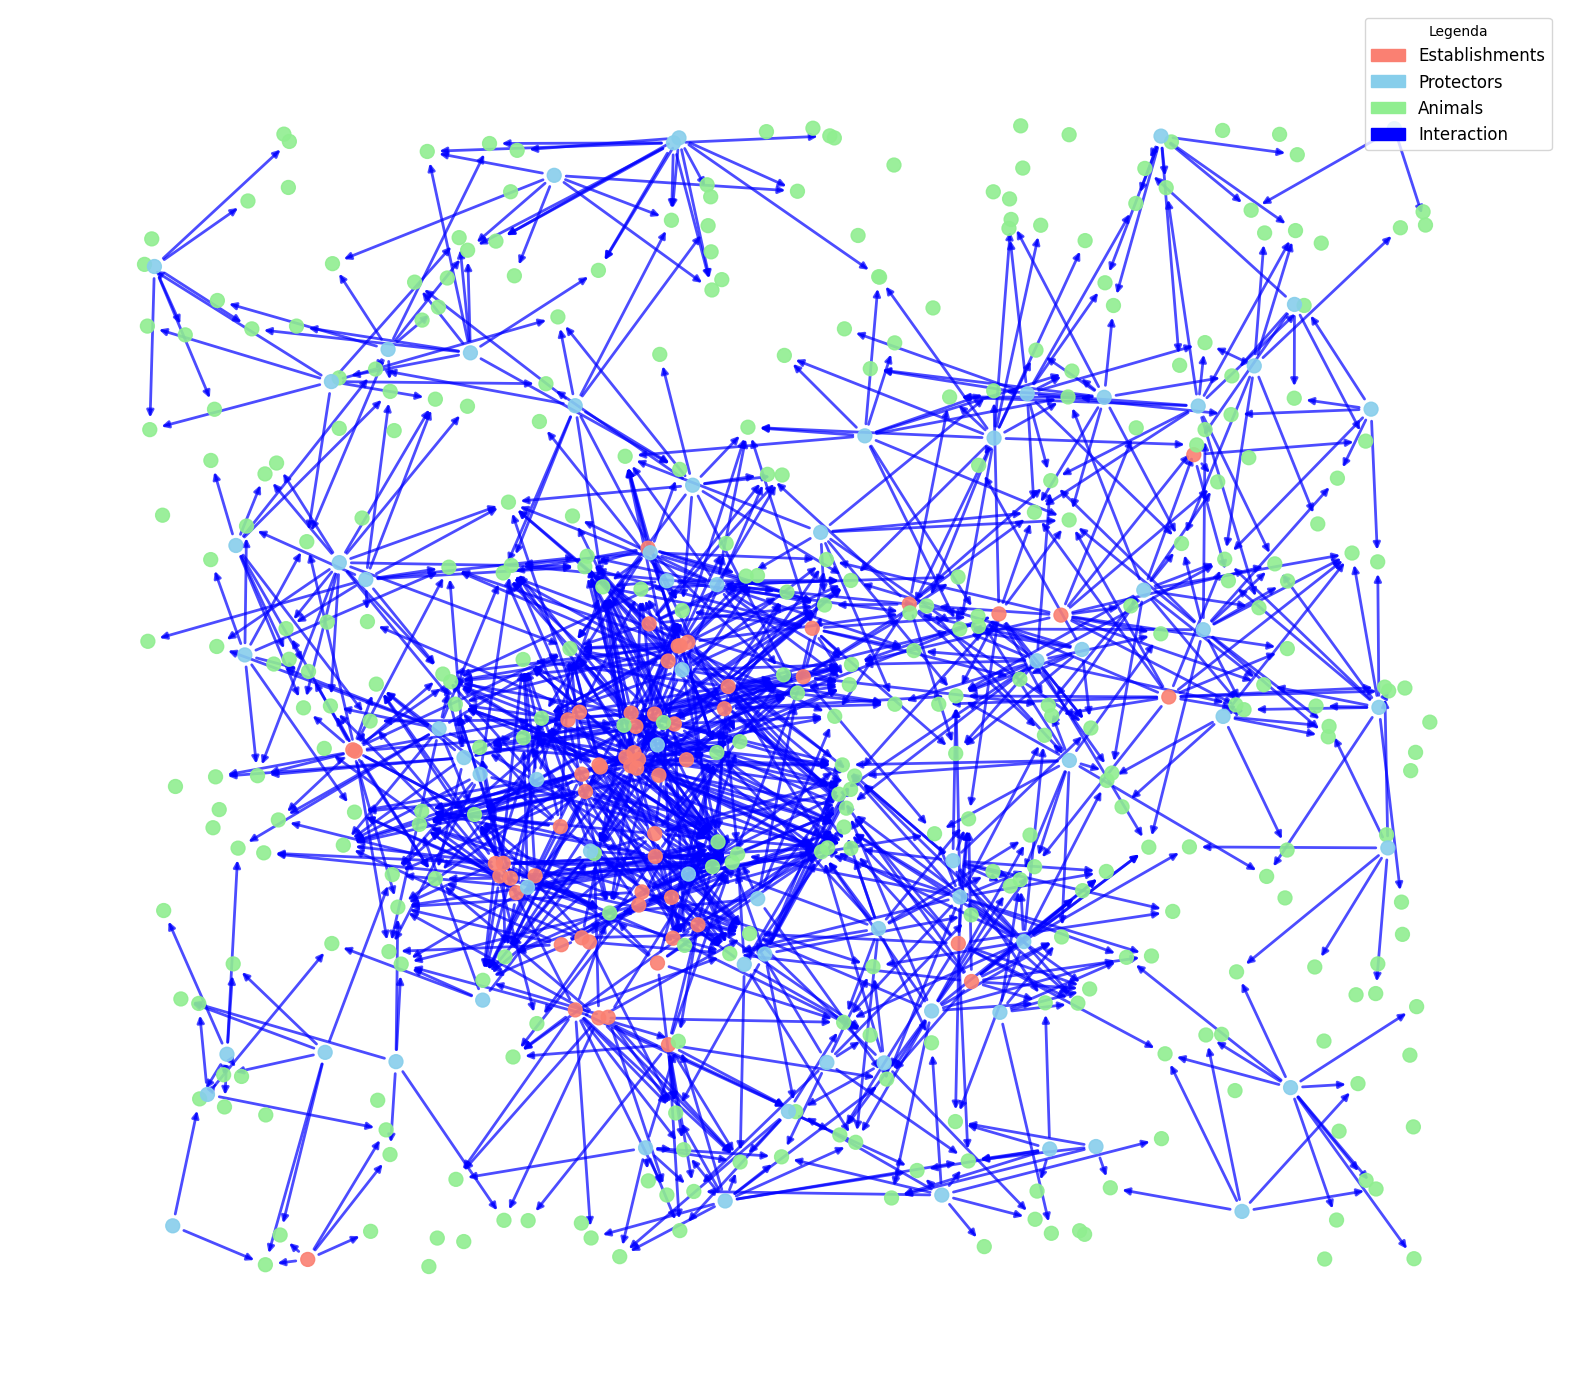

In [28]:

color_map = {'usuario': 'skyblue', 'animal': 'lightgreen', 'estabelecimento': 'salmon'}
shape_map = {'usuario': 'o', 'animal': 's', 'estabelecimento': 'D'}

edge_color_map = {
    "interacao": "blue",
    "reporte": "green"
}

node_colors = [color_map[G.nodes[node]['tipo']] for node in G.nodes]

edge_colors = [
    edge_color_map[data['tipo']]
    for _, _, data in G.edges(data=True)
]

plt.figure(figsize=(20, 20))

plt.gca().set_aspect('equal', adjustable='box')

nx.draw_networkx_nodes(
    G, pos,
    node_color=node_colors,
    alpha=0.9,
    node_size=100
)

nx.draw_networkx_edges(
    G, pos,
    edge_color=edge_colors,
    alpha=0.7,
    width=2
)

plt.legend(
    handles=[
        mpatches.Patch(color='salmon', label='Establishments'),
        mpatches.Patch(color='skyblue', label='Protectors'),
        mpatches.Patch(color='lightgreen', label='Animals'),
        mpatches.Patch(color='blue', label='Interaction'),
    ],
    loc="upper right",
    fontsize=12,
    title="Legenda"
)

plt.axis("off")

plt.show()


In [29]:
!pip install python-louvain

Detectando comunidades na camada: abrigo temporário
Modularidade na camada temporary shelter: 0.8285


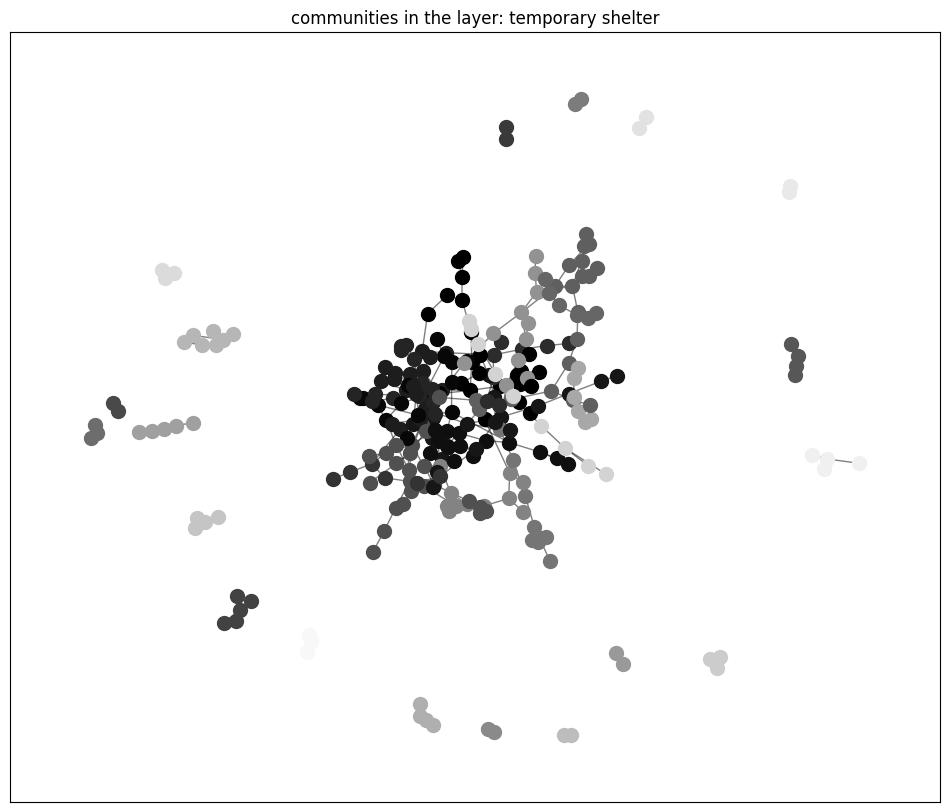

Detectando comunidades na camada: resgate
Modularidade na camada rescue: 0.8226


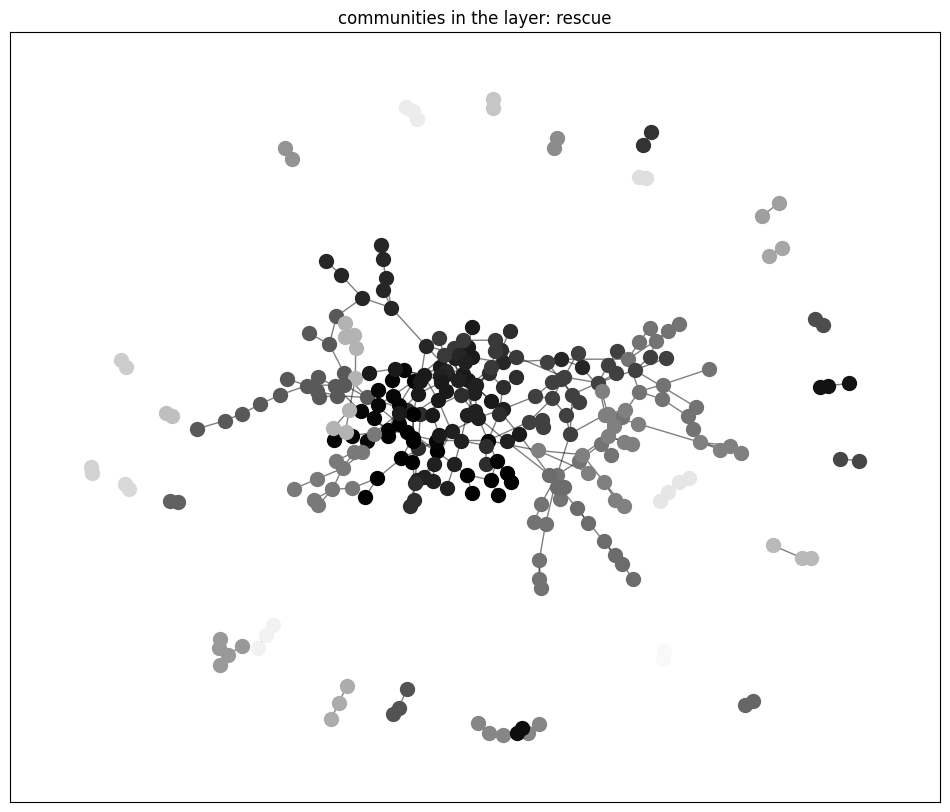

Detectando comunidades na camada: doação
Modularidade na camada donation: 0.8238


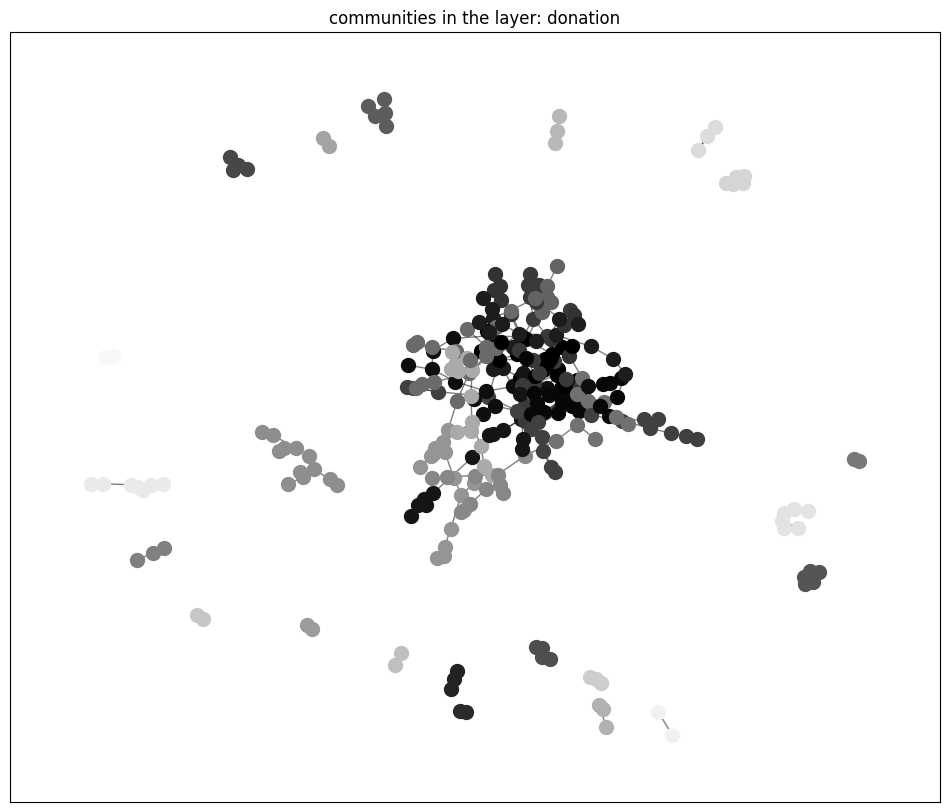

Detectando comunidades na camada: apadrinhamento
Modularidade na camada sponsorship: 0.8652


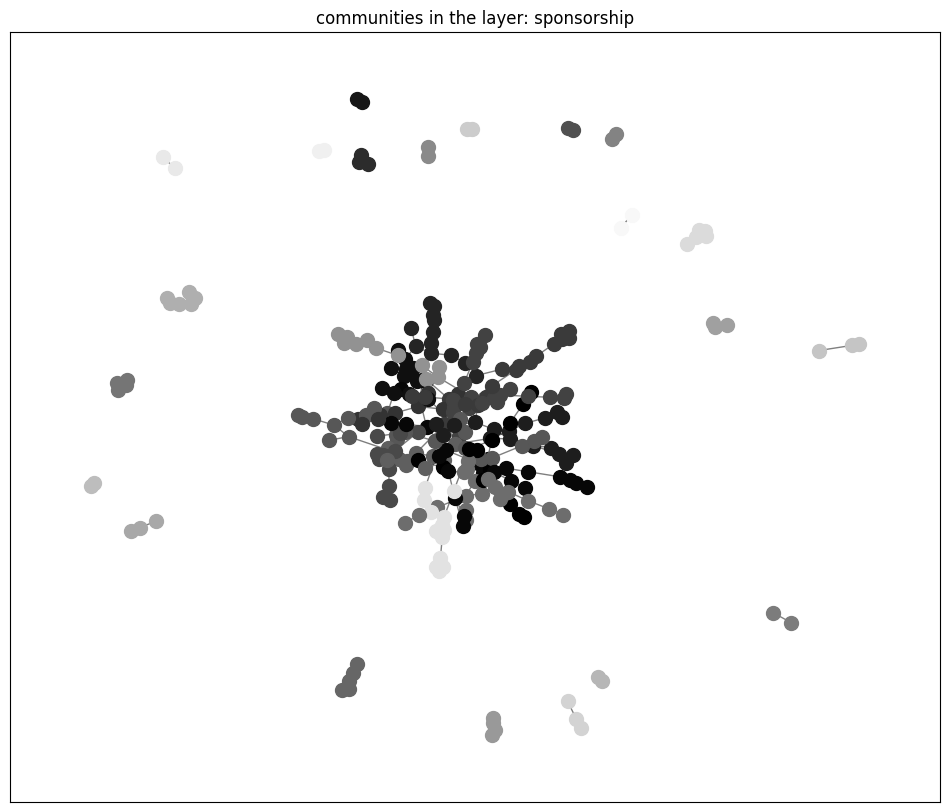

In [30]:
from community import community_louvain

def create_multiplex_from_existing_graph(G):
    layers = {}
    for edge in G.edges(data=True):
        layer = edge[2].get('tipo_interacao', 'desconhecido')
        if layer not in layers:
            layers[layer] = nx.Graph()
        layers[layer].add_edge(edge[0], edge[1], **edge[2])

    return layers

def detect_communities_louvain(graph):
    partition = community_louvain.best_partition(graph)
    return partition

def calculate_modularity(graph, partition):
    modularity = community_louvain.modularity(partition, graph)
    return modularity

def visualize_communities(graph, partition, title="Comunidades na Rede Multiplex"):
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(12, 10))

    for node, community in partition.items():
        nx.draw_networkx_nodes(graph, pos, [node], node_size=100, node_color=str(community / len(set(partition.values()))))

    nx.draw_networkx_edges(graph, pos, alpha=0.5)

    plt.title(title)
    plt.show()


multiplex_layers = create_multiplex_from_existing_graph(G)
for layer, layer_graph in multiplex_layers.items():
    print(f"Detectando comunidades na camada: {layer}")
    partition = detect_communities_louvain(layer_graph)


    modularity = calculate_modularity(layer_graph, partition)


    if layer == 'resgate': layer = 'rescue'
    if layer == 'abrigo temporário': layer = 'temporary shelter'
    if layer == 'doação': layer = 'donation'
    if layer == 'apadrinhamento': layer = 'sponsorship'

    print(f"Modularidade na camada {layer}: {modularity:.4f}")
    visualize_communities(layer_graph, partition, title=f"communities in the layer: {layer}")


In [31]:
def get_important_protectors(G, top_n=10):
    # Função para obter os principais protetores pelo número de animais ajudados
    def get_top_protectors_by_help(G, top_n):
        protectors = [node for node, data in G.nodes(data=True) if data['tipo'] in ['usuario', 'estabelecimento']]
        protector_help_count = {
            protector: sum(
                G[protector][neighbor].get('weight', 1)
                for neighbor in G.neighbors(protector)
                if G.nodes[neighbor]['tipo'] == 'animal'
            )
            for protector in protectors
        }
        return sorted(protector_help_count.items(), key=lambda x: x[1], reverse=True)[:top_n]

    # Calcular centralidade de betweenness
    def calculate_betweenness(G):
        return nx.betweenness_centrality(G, weight='weight')

    # Obter dados de ajuda
    protector_help = get_top_protectors_by_help(G, top_n=len(G.nodes))

    # Calcular centralidade de betweenness
    betweenness = calculate_betweenness(G)

    # Combinar dados
    protector_scores = []
    for protector, count in protector_help:
        if protector in betweenness:
            protector_nome = G.nodes[protector].get('nome', protector)  # Recuperar nome real
            protector_scores.append((protector_nome, count, betweenness[protector]))

    # Ordenar por número de animais ajudados e betweenness
    sorted_protectors = sorted(protector_scores, key=lambda x: (x[1], x[2]), reverse=True)

    for nome, count, score in sorted_protectors[:top_n]:
        print(f"{nome}: {count} animais ajudados")

    return sorted_protectors[:top_n]

# Exemplo de uso:
important_protectors = get_important_protectors(G, top_n=5)


Nathan Santos: 41.108695060628804 animais ajudados
Marcelo Barros: 40.3114478815375 animais ajudados
ProntoVet 24 Horas - Clínica Veterinária: 39.05073428992273 animais ajudados
Vinicius da Costa: 38.08060506118031 animais ajudados
Pedro Henrique Montenegro: 36.73092571704328 animais ajudados


In [ ]:
def plot_subgraph_with_geographic_positions(G, top_n=5):

    protectors = [node for node, data in G.nodes(data=True) if data['tipo'] in ['usuario', 'estabelecimento']]
    protector_help_count = {
        protector: sum(
            G[protector][neighbor].get('weight', 1)
            for neighbor in G.neighbors(protector)
            if G.nodes[neighbor]['tipo'] == 'animal'
        )
        for protector in protectors
    }

    top_protectors = sorted(protector_help_count.items(), key=lambda x: x[1], reverse=True)[:top_n]

    subgraph_nodes = set()
    for protector, _ in top_protectors:
        subgraph_nodes.add(protector)
        subgraph_nodes.update(
            neighbor for neighbor in G.neighbors(protector) if G.nodes[neighbor]['tipo'] == 'animal'
        )
    subgraph = G.subgraph(subgraph_nodes)

    pos = {node: (data['longitude'], data['latitude']) for node, data in subgraph.nodes(data=True)}

    labels = {
        node: G.nodes[node].get('nome', node)
        for node in subgraph.nodes if G.nodes[node]['tipo'] in ['usuario', 'estabelecimento']
    }

    plt.figure(figsize=(12, 10))

    protector_nodes = [node for node in subgraph if G.nodes[node]['tipo'] == 'usuario']
    establishment_nodes = [node for node in subgraph if G.nodes[node]['tipo'] == 'estabelecimento']
    animal_nodes = [node for node in subgraph if G.nodes[node]['tipo'] == 'animal']

    nx.draw_networkx_nodes(subgraph, pos, nodelist=protector_nodes, node_color='skyblue', node_size=500)
    nx.draw_networkx_nodes(subgraph, pos, nodelist=establishment_nodes, node_color='salmon', node_size=500)
    nx.draw_networkx_nodes(subgraph, pos, nodelist=animal_nodes, node_color='lightgreen', node_size=300)

    nx.draw_networkx_edges(subgraph, pos, alpha=0.5)

    for node, (x, y) in pos.items():
        if G.nodes[node]['tipo'] in ['usuario', 'estabelecimento']:
            plt.text(
                x, y + 0.001,
                labels[node],
                fontsize=9,
                ha='center',
                bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2')
            )

    plt.scatter([], [], c='skyblue', s=500, label='Protectors')
    plt.scatter([], [], c='salmon', s=500, label='Establishments')
    plt.scatter([], [], c='lightgreen', s=300, label='Animals')

    plt.title("Top 5 protectors and establishments that help the most")
    plt.legend(loc="upper right", title="Legend", fontsize=9, title_fontsize=10)
    plt.axis("off")
    plt.show()

plot_subgraph_with_geographic_positions(G, top_n=5)


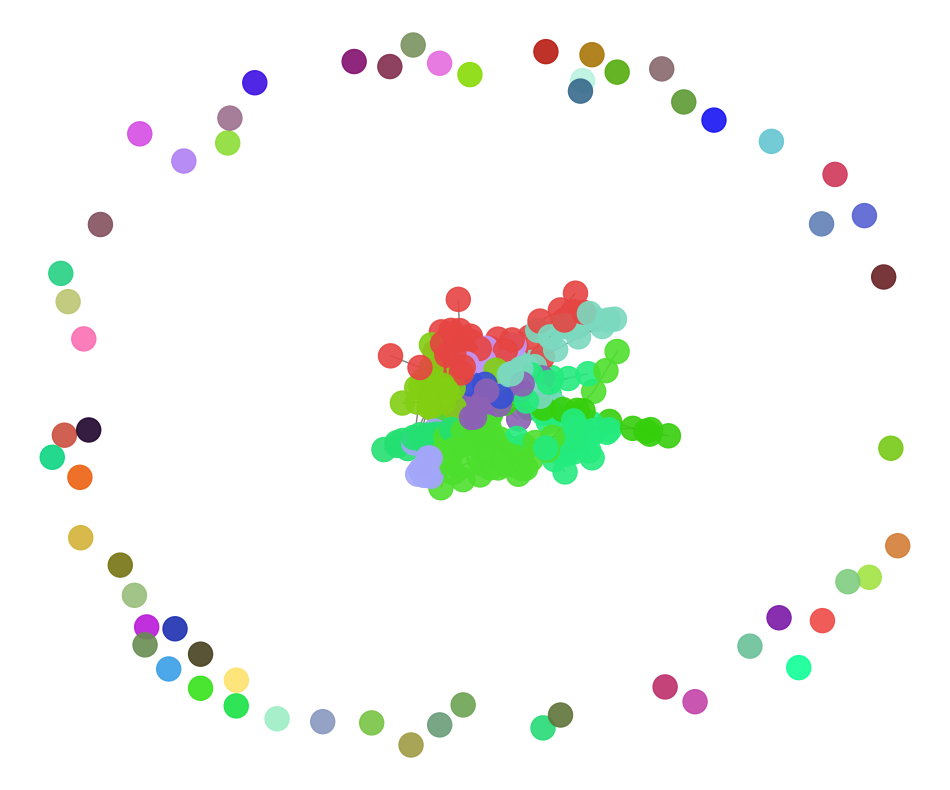

In [32]:
import matplotlib.pyplot as plt
import networkx as nx
from community import community_louvain
import random

import matplotlib.pyplot as plt
import networkx as nx
import random

def visualize_communities_colored(G, partition):
    communities = set(partition.values())
    community_colors = {community: [random.random() for _ in range(3)] for community in communities}

    node_colors = [community_colors[partition[node]] for node in G.nodes()]

    pos = nx.spring_layout(G)

    plt.figure(figsize=(12, 10))

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=300, alpha=0.9)

    nx.draw_networkx_edges(G, pos, alpha=0.5)

    legend_handles = []
    for community, color in community_colors.items():
        legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Comunidade {community}'))

    plt.axis('off')
    plt.show()


G_undirected = G.to_undirected()

partition = community_louvain.best_partition(G_undirected)

visualize_communities_colored(G_undirected, partition)
